## [2024년 1학기 로봇공학] Ch. 3-b. 3D Rigid-body Motions

- 작성자 : 서울시립대학교 전자전기컴퓨터공학부 박경훈 교수(gyunghoon.park@uos.ac.kr)
- 작성일 : 2024. 3. 26.

In [2]:
import spatialmath as sm
import roboticstoolbox as rtb
import numpy as np
from spatialmath.base import *
from math import *
from scipy import *

### Euler Angle

In [36]:
R1 = rotz(0.1) @ roty(0.2) @ rotz(0.3)
R2 = eul2r(0.1, 0.2, 0.3)
print("R1 :\n",R1)
print("R2 :\n",R2)

R1 :
 [[ 0.902113   -0.38355704  0.19767681]
 [ 0.3875172   0.92164909  0.01983384]
 [-0.18979606  0.0587108   0.98006658]]
R2 :
 [[ 0.902113   -0.38355704  0.19767681]
 [ 0.3875172   0.92164909  0.01983384]
 [-0.18979606  0.0587108   0.98006658]]


<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

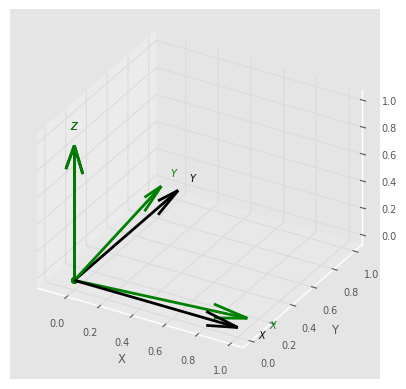

In [47]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)


<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

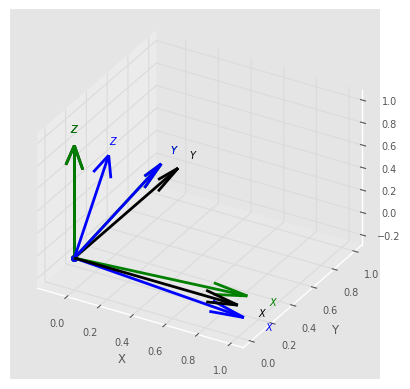

In [48]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)
trplot(rotz(0.1) @ roty(0.2), color = "blue", width=2)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

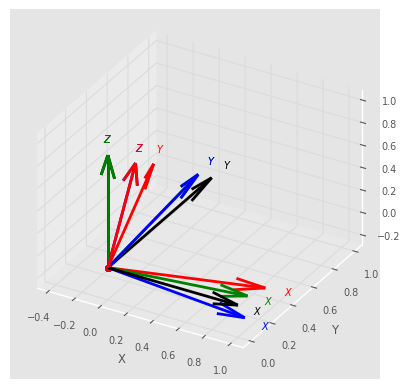

In [49]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)
trplot(rotz(0.1) @ roty(0.2), color = "blue", width=2)
trplot(rotz(0.1) @ roty(0.2) @ rotz(0.3), color = "red", width=2)

In [53]:
gamma = tr2eul(R1)
print("ZYZ Euler angle for R1 :",gamma)

ZYZ Euler angle for R1 : [-0.89989286  0.35887265  0.96956698]


### Roll-pitch-yaw Angle

In [43]:
R3 = rotx(0.1) @ roty(0.2) @ rotz(0.3)
R4 = rpy2r(0.1, 0.2, 0.3, order = "zyx")
print("R3 :\n",R3)
print("R4 :\n",R4)

R3 :
 [[ 0.93629336 -0.28962948  0.19866933]
 [ 0.31299183  0.94470249 -0.0978434 ]
 [-0.15934508  0.153792    0.97517033]]
R4 :
 [[ 0.93629336 -0.27509585  0.21835066]
 [ 0.28962948  0.95642509 -0.03695701]
 [-0.19866933  0.0978434   0.97517033]]


<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

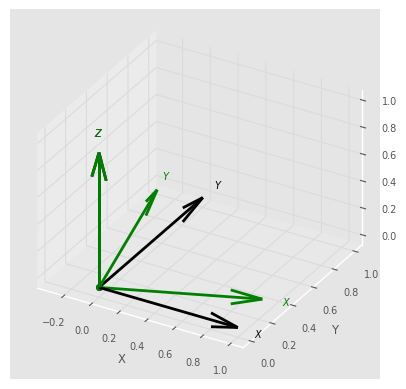

In [54]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.3), color = "green", width=2)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

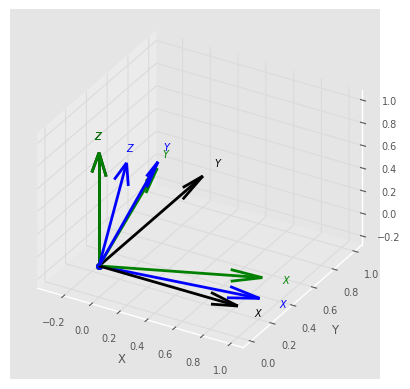

In [55]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.3), color = "green", width=2)
trplot(roty(0.2) @ rotz(0.3), color = "blue", width=2)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

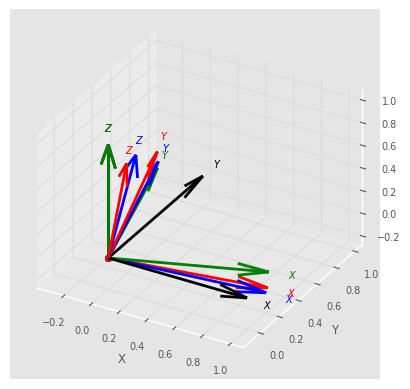

In [56]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.3), color = "green", width=2)
trplot(roty(0.2) @ rotz(0.3), color = "blue", width=2)
trplot(rotx(0.1) @ roty(0.2) @ rotz(0.3), color = "red", width=2)

In [63]:
gamma = tr2rpy(R3, order = "xyz")
print("XYZ roll-pitch-yaw angle for R3 (= ZYX Euler angle) :",gamma)

XYZ roll-pitch-yaw angle for R3 (= ZYX Euler angle) : [0.3 0.2 0.1]


### Homogeneous Transformation

In [65]:
T = transl(2, 0, 0) @ trotx(pi / 2) @ transl(0, 1, 0)
print(T)

[[ 1.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  6.123234e-17]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

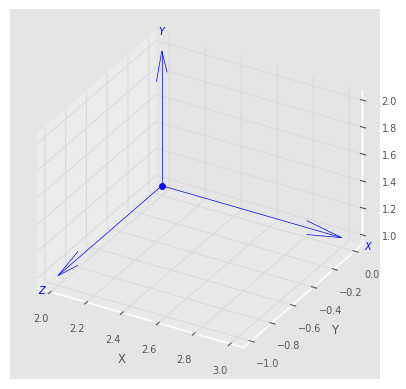

In [66]:
trplot(T)

In [67]:
print("Rotation matrix in T :\n", t2r(T))
print("Translation vector in T :\n", transl(T))

Rotation matrix in T :
 [[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]
Translation vector in T :
 [2.000000e+00 6.123234e-17 1.000000e+00]


In [73]:
print("ZYZ Euler angle for orientation in T :\n", tr2eul(t2r(T)))

ZYZ Euler angle for orientation in T :
 [-1.57079633  1.57079633  1.57079633]


In [76]:
L = linalg.logm(T)
S = vexa(L)
print("Twist vector for T :\n",S)

Twist vector for T :
 [2.         0.78539816 0.78539816 1.57079633 0.         0.        ]


### Twist와 screw coordinates

In [9]:
S = sm.Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])
print(S)

(0 0 0; 1 0 0)


In [13]:
print("Twist S :", S.S)
print("Twist S의 linear velocity :", S.v)
print("Twist S의 angular velocity :", S.w)

Twist S : [-0. -0. -0.  1.  0.  0.]
Twist S의 linear velocity : [-0. -0. -0.]
Twist S의 angular velocity : [1. 0. 0.]


In [24]:
print("exp([S]) :\n",S.SE3())

exp([S]) :
    1         0         0         0         
   0         0.5403   -0.8415    0         
   0         0.8415    0.5403    0         
   0         0         0         1         



$e^{[\mathcal{S}]\theta}$는 다음과 같이 계산합니다.

In [25]:
print("exp([S*0.3]) :\n",S.exp(0.3))

exp([S*0.3]) :
    1         0         0         0         
   0         0.9553   -0.2955    0         
   0         0.2955    0.9553    0         
   0         0         0         1         



### 3D Screw Motion

In [3]:
S = sm.Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])
linalg.expm(0.3 * skewa(S.S))
S.exp(0.3)

   1         0         0         0         
   0         0.9553   -0.2955    0         
   0         0.2955    0.9553    0         
   0         0         0         1         


In [5]:
S = sm.Twist3.UnitRevolute([0, 0, 1], [2, 3, 2], 0.5)
X = transl(3, 4, -4)

Axes3D(0.125,0.11;0.775x0.77)


[[<mpl_toolkits.mplot3d.art3d.Line3D at 0x2000e652f30>]]

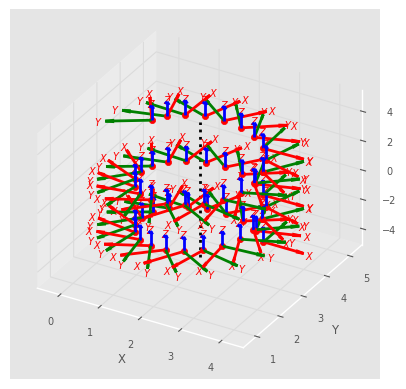

In [6]:
for theta in np.arange(0, 15, 0.3):
    trplot(S.exp(theta).A @ X, style="rgb", width=2)
L = S.line()
L.plot("k:", linewidth=2)

### Transform Spatial Velocities via Adjoint Matrix

In [85]:
Tab = sm.SE3.Tx(-2) * sm.SE3.Rz(-pi/2) * sm.SE3.Rx(pi/2)
Vb = [1, 2, 3, 1, 0, 0]

In [82]:
print("Adjoint matrix for T_{ab} : \n", Tab.Ad())

Adjoint matrix for T_{ab} : 
 [[ 6.12323400e-17  6.12323400e-17 -1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  3.74939946e-33 -6.12323400e-17  0.00000000e+00
   2.00000000e+00  1.22464680e-16]
 [ 0.00000000e+00  1.00000000e+00  6.12323400e-17  2.00000000e+00
  -7.49879891e-33  1.22464680e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.12323400e-17
   6.12323400e-17 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+00
   3.74939946e-33 -6.12323400e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  6.12323400e-17]]


In [86]:
Va = Tab.Ad() @ Vb
print("Spartial velocity in {a} frame : \n", Va)

Spartial velocity in {a} frame : 
 [-3.000000e+00 -1.000000e+00  4.000000e+00  6.123234e-17 -1.000000e+00
  0.000000e+00]
